In [25]:
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success">

**Compléments au support de cours sur la régression simple :**

Afin d'approfondir le cours, vous pouvez étudier les ressources suivantes :
* Vidéo sur l'apprentissage statistique, et en particulier sur la régression linéaire : https://www.youtube.com/watch?v=Ee8gLwVCPxg
* Vidéo sur l'apprentissage supervisé, l'algorithme des k plus proches voisins (10 premières minutes de la vidéo) : https://www.youtube.com/watch?v=2J9Y9yh7gd8

</div>

# 1. Régression

**Chargement du jeu de données**

In [2]:
DATA = pd.read_csv('data/movie_metadata3.csv', delimiter=';', index_col='movie_title')

## 1.1. Régression simple

**Régression simple** : mettre en évidence une relation entre une variable explicative $X$ et une variable à expliquer $Y$, notamment dans un objectif de prévision. 


<span style="color: #27AE60"> **Exemple :** </span> Le succès d'un film peut-il être expliqué par le budget investi ? Comment se caractérise cette relation ? 

Dans ce cas, la variable explicative est le budget, et la variable à expliquer pourrait être la note attribuée au film ou le nombre d'entrées (qui donnent une indication du succès recontré par le film). 


A partir des couples d'observations $(x_i, y_i)$ on cherche la relation statistique $y_i \approx f(x_i)$ entre les deux variables $X$ et $Y$ qui doit permettre de prévoir la valeur de $Y$ pour une valeur donnée de $X$ :

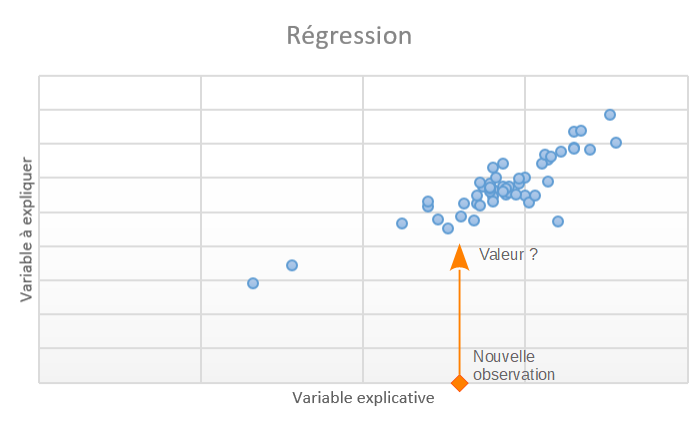

Afin de définir le symbole $\approx$, il faut se donner une classe de fonctions $\mathcal{G}$ (fonctions linéaires, fonctions polynomiales, etc) représentant tous les modèles de prévision que l'on s'autorise à explorer et dans laquelle on va chercher la fonction $f$ qui explique le mieux possible les données  $(x_i, y_i)$ déjà observées. 
 

*Expliquer le mieux possible les données* se traduit mathématiquement par la minimisation d'une fonction de coût que l'on notera $l(\cdot)$ : 
\begin{equation}
\underset{f \in \mathcal{G}}{\mbox{argmin}} \sum_{i = 1}^{N} l(y_i - f(x_i))
\end{equation}

Les valeurs de la fonction de coût $l(\cdot)$ seront élevées lorsque la fonction $f$ n'explique pas bien les données observées (dans ce cas, la distance entre la valeur $y_i$ observée et la valeur $f(x_i)$ prédite est grande).

Le choix de la fonction de coût ne doit pas être négligé dans le processus de régression car différentes fonctions de coût peuvent mener à différentes estimations de la fonction recherchée $f$.


### 1.1.1 Fonctions de coût classiques

Les deux fonctions de coût les plus classiques sont : 
* la fonction de coût absolu : $l(u) = | u |$,
* la fonction de coût quadratique : $l(u) = u^2$


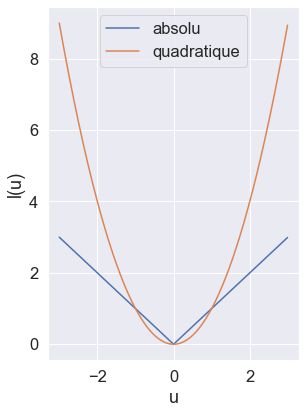

In [3]:
u = np.arange(-3, 3, 0.01)
plt.figure(figsize = (4.5, 6.5))
plt.plot(u, np.abs(u))
plt.plot(u, u**2)
plt.legend(['absolu', 'quadratique'])
plt.xlabel('u')
plt.ylabel('l(u)')
plt.show()

### 1.1.2. Choix des fonctions de la classe $\mathcal{G}$

**Objectif de la régression :** modéliser la relation, définie par la fonction $f$, entre les variables $X$ et $Y$. 

**Remarques :**
* Cela permet dans un second temps de prédire la valeur prise par $Y$ pour toute nouvelle mesure de $X$.
* Afin d'estimer $f$ on dispose d'un nombre limité d'observations $(x_i, y_i)$. 
* Une première intuition (erronée) serait de trouver les fonctions $f$ qui annulent parfaitement le critère $$\underset{f \in \mathcal{G}}{\mbox{argmin}} \sum_{i = 1}^{N} l(y_i - f(x_i))$$  quelle que soit la fonction de coût utilisée, c'est-à-dire l'ensemble des fonctions continues qui passent exactement par les points $(x_i, y_i)$. 

**Pourquoi c'est une mauvaise idée ?** 

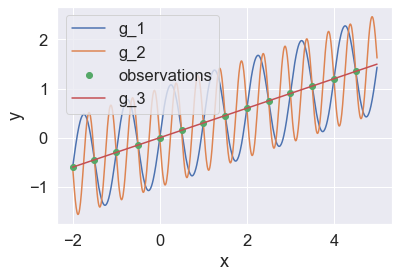

In [4]:
t = np.arange(-2, 5, 0.01)
x = np.arange(-2, 5, 0.5)
y = 0.3*t + np.sin(2*np.pi*t)
plt.plot(t,y)
plt.plot(t, 0.3*t - np.sin(2*np.pi*2*t))
plt.plot(x, 0.3*x, '.', markersize=12 )
plt.plot(t, 0.3*t)
plt.legend(['g_1', 'g_2', 'observations', 'g_3'])
plt.xlabel('x') ; plt.ylabel('y')
plt.show()

g_1 et g_2 passent toutes les deux par tous les points, mais g_3 est plus convenable.

**Critères de choix :**
* on préférera une fonction relativement lisse, souvent paramétrique,
* la fonction ne passe pas forcément par tous les points mais minimise globalement le critère pour la fonction de coût choisie

La classe de fonctions lisses la plus simple est la classe des fonctions affines, on parlera alors de régression linéaire (simple). 

D'autres classes de fonctions peuvent être choisie, en particulier lorsque l'observateur dispose d'information $\textit{a priori}$ du phénomène observé, **d'où l'importance de visualiser graphiquement les données** avant de réaliser une régression. 

<span style="color: #27AE60"> **Exemple :** </span> Quelle classe de fonctions utiliser pour chacun des cas ci-dessous ? 

- Fonction linéaire (cf. https://fr.wikipedia.org/wiki/Fonction_lin%C3%A9aire_(analyse))
- Fonction polynomiale du second degré (cf. https://fr.wikipedia.org/wiki/Fonction_du_second_degr%C3%A9)
- Fonction trigonométrique (cf. https://fr.wikipedia.org/wiki/Fonction_trigonom%C3%A9trique#Repr%C3%A9sentations_graphiques)


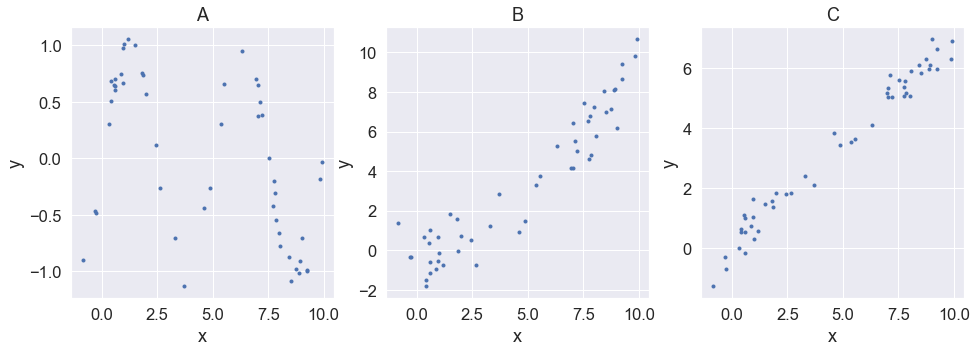

In [55]:
x = np.random.uniform(-1, 10, 50)
x = np.sort(x)
plt.figure(figsize = (16,5))
plt.subplot(131); plt.plot(x, np.sin(2*np.pi*0.2*x)+ np.random.normal(0, 0.1, len(x)),'.')
plt.xlabel('x'); plt.ylabel('y'); plt.title('A')
plt.subplot(132); plt.plot(x, x**2/10 + np.random.normal(0, 1, len(x)),'.')
plt.xlabel('x'); plt.ylabel('y'); plt.title('B')
plt.subplot(133); plt.plot(x, 0.7*x + np.random.normal(0, 0.4, len(x)),'.')
plt.xlabel('x'); plt.ylabel('y'); plt.title('C')
plt.show()

<span style="color: #27AE60"> **Solution :** </span> 

* A : Fonction trigonométrique (sinus)
* B : Fonction polynomiale du second degré
* C : Fonction linéaire

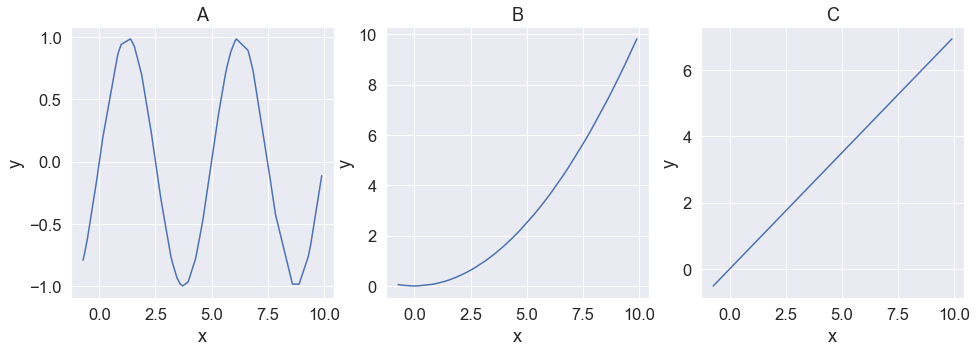

## 1.2. Cas particulier de la régression linéaire



La régression linéaire consiste à chercher la droite qui explique au mieux les données $(x_i, y_i)$ observées. On suppose alors que la relation entre les variables $X$ et $Y$ est de la forme : 
\begin{equation}
Y = a X + b
\end{equation}
En réalité, les observations sont rarement distribuées suivant une droite parfaite.


On suppose alors que la relation $Y = a X + b$ est perturbée par un terme $\epsilon$ que l'on appellera *bruit* : 
\begin{equation}
Y = a X + b + \epsilon
\end{equation}


Cette équation est appelée *modèle de régression linéaire* (simple), avec :
* $a$ : coefficient de régression
* $b$ : constante de régression
* $\epsilon$ : bruit ou erreur du modèle

L'objectif est donc de trouver les valeurs de $a$ et $b$ (qui sont inconnues) permettant de fournir les meilleurs résultats, où :

- $b$ est l'ordonnée à l'origine de la droite de régression, c'est-à-dire la valeur Y quand x vaut 0.

- $a$ est la pente de la droite de régression, c'est-à-dire la variation de Y quand X augmente d'une unité.

La relation peut s'exprimer pour chaque observation $(x_i, y_i)$  : 
\begin{equation}
y_i = a x_i + b + \epsilon_i
\label{eq:modele}
\end{equation}
où : 
* $x_i$ est une observation mesurée de la variable non aléatoire $X$, 
* $a$ et $b$ sont les paramètres du modèle à estimer, 
* $\epsilon_i$ est une réalisation inconnue de la variable aléatoire $\epsilon$, 
* $y_i$ est une réalisation observée de la variable aléatoire $Y$. 

**Estimation de $(\hat a, \hat b)$ :** en général, utilisation d'une fonction de coût quadratique. 


Ainsi le critère à minimiser pour estimer $a$ et $b$, qui définissent la droite recherchée, est : 
\begin{equation}
\underset{f \in \mathcal{G}}{\mbox{argmin}} \sum_{i = 1}^{N} l(y_i - f(x_i) ) = \underset{a,b}{\mbox{argmin}} \sum_{i = 1}^{N} (y_i - a x_i - b )^2
\label{eq:crit_MC}
\end{equation}

Ceci correspond à minimiser la somme des carrés des erreurs (distance entre chaque valeur $y_i$ observée et la valeur prédite sur la ligne : cette distance est aussi appelée résidu).

On appelle **estimateur au sens des moindres carrés** le couple $(\hat{a}, \hat{b})$ tel que : 
\begin{equation}
(\hat{a}, \hat{b}) = \underset{a,b}{\mbox{argmin}} \sum_{i = 1}^{N} (y_i - a x_i - b )^2 = \underset{a,b}{\mbox{argmin}} S(a,b)
\end{equation}

La fonction $S$ est strictement convexe $\rightarrow$ si elle admet un point singulier alors il s'agit de l'unique minimum de cette fonction. 

Ce minimum correspond aux paramètres $(\hat{a}, \hat{b})$ recherchés.

**Méthode de calcul de $\hat{a}$ et $\hat{b}$ :**

* Calcul des moyennes empiriques $\bar{x}$ et $\bar{y}$ des variables $X$ et $Y$ à partir des $N$ observations $(x_i, y_i)$. La droite de régression passe par le point de coordonnées ($\bar{x}$, $\bar{y}$).
* Calcul des coefficients de la droite de régression : 

	$\hat{a} = \frac{\sum x_i(y_i - \bar{y})}{\sum x_i(x_i - \bar{x})}$
	
	$\hat{b} = \bar{y} - \hat{a}\bar{x}$

<span style="color: #27AE60"> **Exemple :**</span>  Régression lineaire sur la relation 'num_voted_users' et 'num_user_for_reviews'. 

La question est de savoir si le nombre d'utilisateurs ayant noté de film est proportionnel au nombre d'utilisateurs ayant écrit une critique sur le film (ou inversement).

$\rightarrow$ Représentation des données sous la forme de nuage de points pour visualiser la linéarité (ou non) des données. 

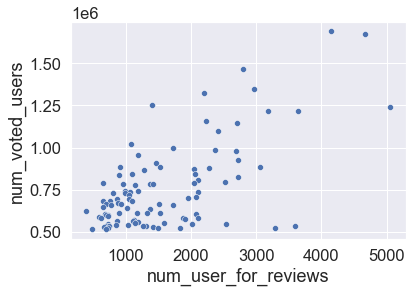

In [56]:
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(DATA.head(n=100), columns=['num_voted_users', 'num_user_for_reviews'])
df2 = (df - df.mean(axis = 0))/df.std(axis = 0)
X = df['num_user_for_reviews'].to_numpy()
X = X.reshape(-1, 1) # étape nécessaire pour la mise en forme des données attendue par LinearRegression
Y = df['num_voted_users'].to_numpy()
Y = Y.reshape(-1, 1)
sns.scatterplot(x="num_user_for_reviews", y='num_voted_users',legend="full", data=df)
plt.show()

Estimation : a = 175.7 et b = 482048.5


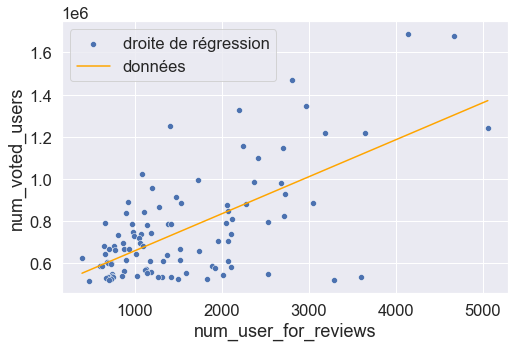

In [57]:
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True,
                 normalize=True)

result = linear_regressor.fit(X, Y)
print("Estimation : a = %.1f" %result.coef_[0] + " et b = %.1f" %result.intercept_)

plt.figure(figsize=(8,5))
sns.scatterplot(x="num_user_for_reviews", y='num_voted_users',legend="full", data=df)
plt.plot([np.min(X), np.max(X)], [result.intercept_ + np.min(X)*result.coef_[0], result.intercept_ + np.max(X)*result.coef_[0]], 'orange')
plt.legend([ 'droite de régression' ,'données'])
plt.show()


L'algorithme trouve que les valeurs optimales des paramètres sont :
* a = 175.72302216 (pente de la droite : num_voted_users augmente d'environ 176 lorsque num_user_for_reviews augmente de 1)
* b = 482048.49006826 (le modèle prédit que num_voted_users vaut environ 482 048 quand num_user_for_reviews vaut 0)

## 1.3. Prédiction linéaire

Une fois les paramètres de la droite de régression linéaire estimés, il est possible d'utiliser ce modèle pour réaliser des prédictions. Pour toute nouvelle valeur $x_{N+1}$ mesurée, on peut calculer la prédiction :
\begin{equation}
\hat{y}_{N+1} = \hat{a} x_{N+1} + \hat{b}
\end{equation}

Il s'agit d'une estimation, car la vraie valeur $y_{N+1}$ a l'expression suivante : 
\begin{equation}
y_{N+1} = a x_{N+1} + b + \epsilon_{N+1}
\end{equation}
où 
* $a$ et $b$ sont les vraies valeurs (inconnues) de la droite de régression,
* $\epsilon_{N+1}$ est une réalisation (inconnue) du bruit $\epsilon$.

Pour prédire une valeur pour une nouvelle observation (par exemple num_user_for_reviews = 1000), on procède de la manière suivante :

In [58]:
X_new = [[1000]]
print(linear_regressor.predict(X_new))

[[657771.51222454]]


**Erreur de prédiction**

On appelle *erreur de prédiction* la quantité 
\begin{equation}
e_{N+1} = y_{N+1} - \hat{y}_{N+1} = (a -\hat{a})x_{N+1} + (b - \hat{b}) + \epsilon_{N+1}.
\end{equation}
L'erreur de prédiction rassemble deux sources d'erreurs : 
* l'erreur de modélisation représentée par $\epsilon_{N+1}$,
* l'erreur réalisée sur les estimateurs $\hat{a}$ et $\hat{b}$.

Sur l'exemple précédent, on utilise la droite de régression estimée et on la compare aux données elles-mêmes. Dans le cas d'une relation linéaire parfaite, les données se situent sur la droite, dans ce cas la prédiction pour un nouveau film sera précise. Dans notre cas, on peut remarquer que l'erreur de prédiction sera grande car les points s'écartent beaucoup de la droite estimée. 

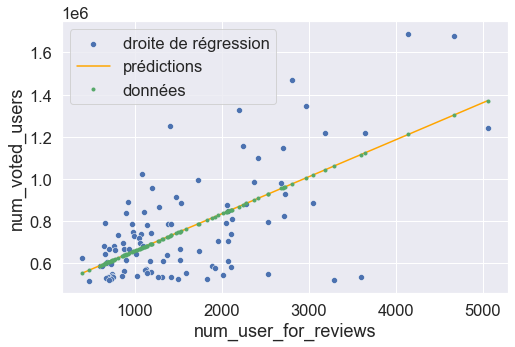

In [59]:
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True,normalize=True)
result = linear_regressor.fit(X, Y)
y_pred =  result.intercept_ + X*result.coef_[0]
plt.figure(figsize=(8,5))
sns.scatterplot(x="num_user_for_reviews", y='num_voted_users',legend="full", data=df)
plt.plot([np.min(X), np.max(X)], [result.intercept_ + np.min(X)*result.coef_[0], result.intercept_ + np.max(X)*result.coef_[0]], 'orange')
plt.plot(X, y_pred, '.g')
plt.legend([ 'droite de régression','prédictions' ,'données'])
plt.show()

**Coefficient de détermination $R^2$**

Le coefficient de détermination $R^2$ est le rapport entre la variance expliquée par la régression et la variance des observations de $Y$ : 
\begin{equation}
R^2 = \frac{\sum(\hat{y}_i - \bar{y})^2}{\sum(y_i - \bar{y})^2}
\end{equation}

**Propriétés :**
* indicateur de qualité de la régression linéaire,
* mesure le degré de ressemblance entre la droite de régression linéaire et les données réellement observées,
* $R^2 = 1$ indique que la droite de régression ajuste parfaitement les données,
* $R^2 = 0$ indique le modèle de régression linéaire n'explique pas du tout les données

Graphiquement cela signifie que plus $R^2$ est proche de 1, plus les observations $(x_i, y_i)$ sont proches de la droite de régression estimée.

In [60]:
# Calcul du coefficient de détermination (𝑅²) avec .score() :
r_sq = result.score(X, Y)
print('coefficient de determination:', r_sq)

coefficient de determination: 0.4212334332231845


## 1.4. Corrélation

Pour savoir quand il est utile de faire une régression linéeaire entre deux variables X et Y, on peut : 
* représenter les données sous forme de nuage de points, dans ce cas les points doivent se répartir selon une droite, 
* calculer le coefficient de coorélation des deux variables X et Y. 


**Définition :**

Soient deux variables aléatoires $X$ et $Y$ définies dans $\mathbb{R}^N$ ($N$ individus observés), on définit leur corrélation par : 
\begin{equation*}
Cor(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X) \times Var(Y)}} =  \frac{1}{N}\sum_{i = 1}^N \frac{(x_i - \bar{x})}{\sigma_X}\frac{(y_i - \bar{y})}{\sigma_Y}
\end{equation*}

**Propriétés :**
* La corrélation prend ses valeurs dans $[-1,1]$. 
* Si $Cor(X,Y) = 1$ alors il existe une relation affine entre $X$ et $Y$, l'une des variables est une fonction affine croissante de l'autre variable. 
* Si $Cor(X,Y) = -1$ l'une des variables est une fonction affine décroissante de l'autre variable, on dit qu'elles sont anticorrélées.
* Si les variables $X$ et $Y$ sont indépendantes linéairement alors $Cor(X,Y) = 0$. 
* Corrélation $\neq$ causalité

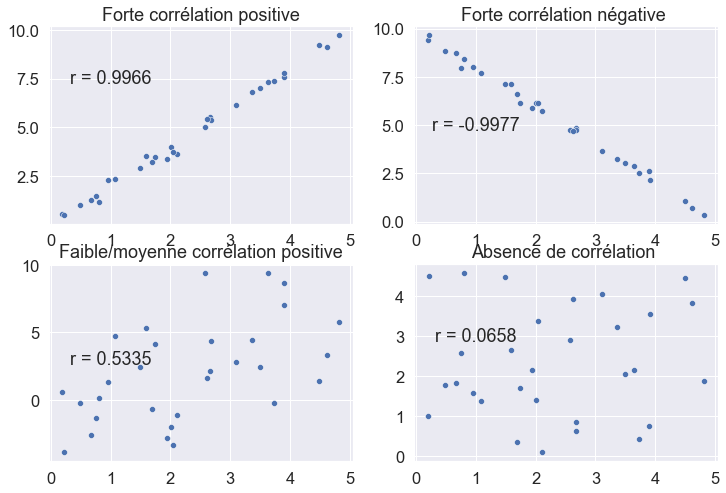

In [61]:
N = 30
x = np.random.uniform(0, 5, N)
y1 = 2*x + np.random.normal(0,0.2, N)
y2 = 10-2*x + np.random.normal(0,0.2, N)
y3 = np.random.normal(x,3,N)
y4 = np.random.uniform(0, 5, N)

plt.figure(figsize = (12, 8))
plt.subplot(221)
sns.scatterplot(x = x, y = y1)
plt.title('Forte corrélation positive')
plt.text(1,7.5 , 'r = '+str(np.round(np.corrcoef(x,y1)[0,1], 4)), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18)

plt.subplot(222)
sns.scatterplot(x = x, y = y2)
plt.title('Forte corrélation négative ')
plt.text(1,5 , 'r = '+str(np.round(np.corrcoef(x,y2)[0,1], 4)), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18)

plt.subplot(223)
sns.scatterplot(x = x, y = y3)
plt.title('Faible/moyenne corrélation positive')
plt.text(1,3 , 'r = '+str(np.round(np.corrcoef(x,y3)[0,1], 4)), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18)

plt.subplot(224)
sns.scatterplot(x = x, y = y4)
plt.title('Absence de corrélation ')
plt.text(1,3 , 'r = '+str(np.round(np.corrcoef(x,y4)[0,1], 4)), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18)

plt.show()

Lorsque l'on a plus que 2 variables, on peut diagnostiquer les relations linéaires parmi tous les couples de variables en calculant tous les coefficients de corrélation à l'aide d'une unique fonction. 

In [62]:
df = pd.DataFrame(DATA.head(n=80), columns=['imdb_score', 'budget', 'duration'])
df.corr()

,imdb_score,budget,duration
imdb_score,1.000000,-0.302542,0.173475
budget,-0.302542,1.000000,0.327186
duration,0.173475,0.327186,1.000000


<AxesSubplot:xlabel='budget', ylabel='imdb_score'>

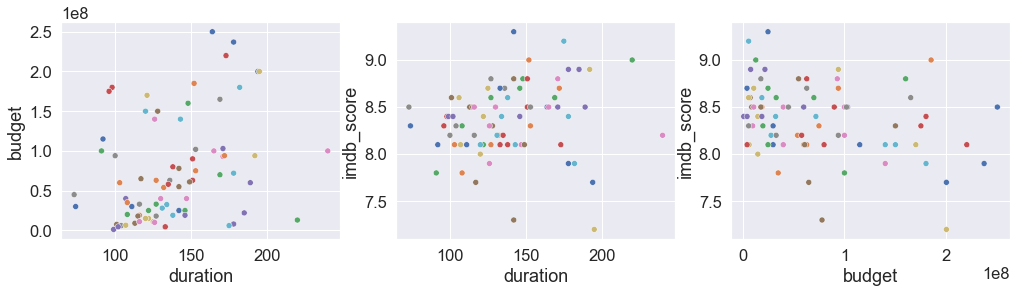

In [63]:
plt.figure(figsize = (17, 4))
plt.subplot(131)
sns.scatterplot(x = 'duration', y = 'budget', data=df, hue = df.index, legend = False, palette='deep')
plt.subplot(132)
sns.scatterplot(x = 'duration', y = 'imdb_score', data=df, hue = df.index, legend = False, palette='deep')
plt.subplot(133)
sns.scatterplot(x = 'budget', y = 'imdb_score', data=df, hue = df.index, legend = False, palette='deep')

**Corrélation de Spearman :**
Il existe d'autres types de corrélations dédiées aux relations non linéaires entre les variables, en particulier la corrélation de Spearman. La corrélation est réalisée sur les rangs des valeurs. 

Prenons deux variables $X$ et $Y$ pour lesquelles on dispose de $N$ échantillons $x_1, x_2, ..., x_N$ et $y_1, y_2, ..., y_N$. Si la relation entre les variables $X$ et $Y$ n'est pas linéaire, il peut cependant exister une relation non linéaire. Pour détecter une telle relation, on ordonne les valeurs $x_1, x_2, ..., x_N$ dans l'ordre croissant, de même pour $y_1, y_2, ..., y_N$. On note $r_{x_i}$ le rang de la variable $x_i$ et $r_{y_i}$ le rang de la variable $y_i$, on a ainsi deux nouvelles variables $R_x$ et $R_y$ dont les valeurs sont les $r_{x_i}$ et $r_{y_i}$. 

La corrélation de Spearman pour les variables $X$ et $Y$ correspond à la corrélation de Pearson (corrélation linéaire) pour les variables de rang associée : on cherche s'il y a une relation linéaire entre les rangs des valeurs des variables $X$ et $Y$. 

<span style="color: #27AE60"> **Exemple :** </span>  Calculons la matrice de corrélation de Pearson et de Spearman pour les 100 premières valeurs du DataFrame DATA. 

In [64]:
# Corrélation de Pearson
DATA.head(n=100).corr()

,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score
num_critic_for_reviews,1.000000,0.166557,0.024987,-0.028411,0.222461,0.651942,0.738530,-0.364040
duration,0.166557,1.000000,0.401765,0.080304,0.339375,0.253467,0.005758,0.179884
num_voted_users,0.024987,0.401765,1.000000,-0.064342,0.649025,0.057579,-0.082154,0.636375
facenumber_in_poster,-0.028411,0.080304,-0.064342,1.000000,-0.043650,0.124225,0.112828,-0.102363
num_user_for_reviews,0.222461,0.339375,0.649025,-0.043650,1.000000,0.275731,0.182785,0.122475
budget,0.651942,0.253467,0.057579,0.124225,0.275731,1.000000,0.598819,-0.436662
title_year,0.738530,0.005758,-0.082154,0.112828,0.182785,0.598819,1.000000,-0.475134
imdb_score,-0.364040,0.179884,0.636375,-0.102363,0.122475,-0.436662,-0.475134,1.000000


In [65]:
# Corrélation de Spearman
DATA.head(n=100).corr(method = 'spearman')

,num_critic_for_reviews,duration,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score
num_critic_for_reviews,1.000000,0.115119,-0.068171,0.009325,0.334383,0.632532,0.860472,-0.467685
duration,0.115119,1.000000,0.432088,0.102197,0.430872,0.293354,0.046159,0.239588
num_voted_users,-0.068171,0.432088,1.000000,-0.013003,0.476475,0.002443,-0.183456,0.687629
facenumber_in_poster,0.009325,0.102197,-0.013003,1.000000,-0.046714,0.088542,0.097120,-0.034167
num_user_for_reviews,0.334383,0.430872,0.476475,-0.046714,1.000000,0.276962,0.204080,0.125393
budget,0.632532,0.293354,0.002443,0.088542,0.276962,1.000000,0.641049,-0.397418
title_year,0.860472,0.046159,-0.183456,0.097120,0.204080,0.641049,1.000000,-0.533065
imdb_score,-0.467685,0.239588,0.687629,-0.034167,0.125393,-0.397418,-0.533065,1.000000


**Observations :** Lorsqu'il exsite effectivement une relation linéaire entre deux variables, la corrélation de Spearman sera également élevée (par exemple entre les variables num_critic_for_reviews et title_year).

**Représentations graphiques de la matrice de corrélation**



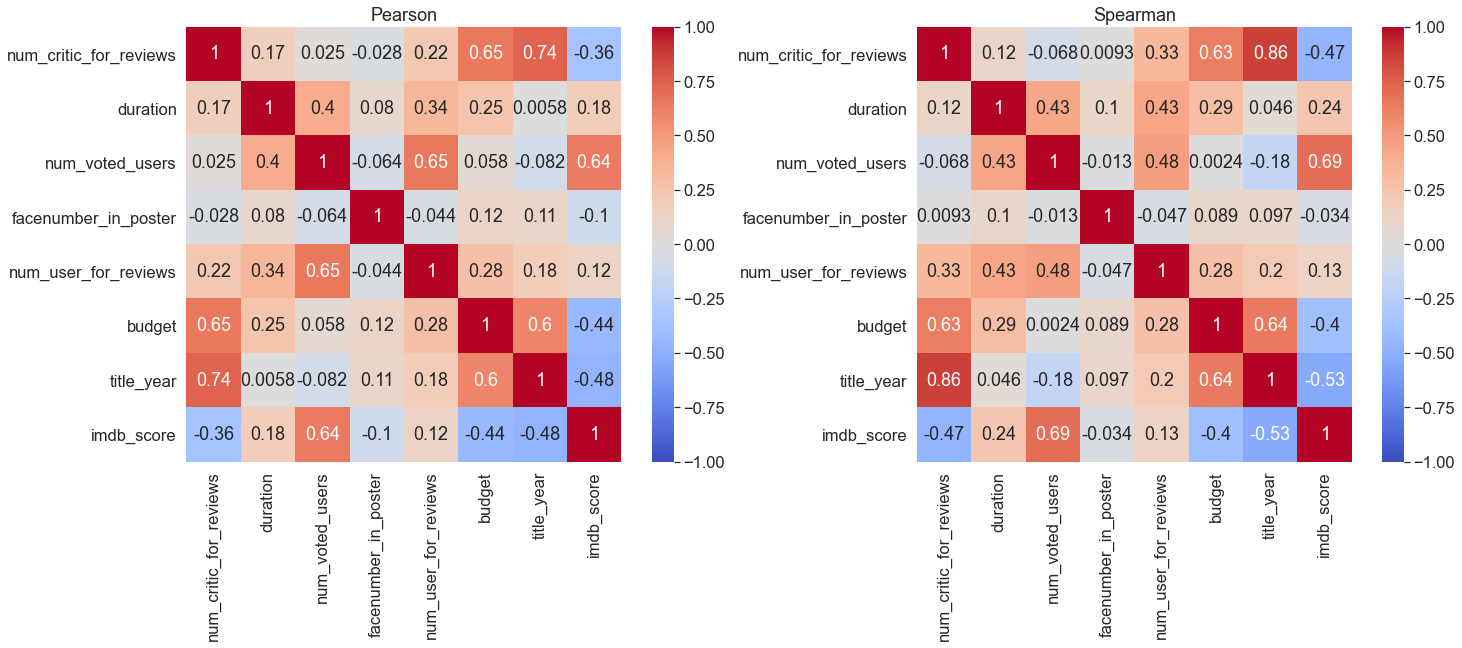

In [68]:
plt.figure(figsize =(24,8))
plt.subplot(121)
sns.heatmap(DATA.head(n=100).corr(method = 'pearson'), annot = True,vmin = -1, vmax = 1, cmap="coolwarm", square = True)
plt.title('Pearson')
plt.subplot(122)
sns.heatmap(DATA.head(n=100).corr(method = 'spearman'), annot = True,vmin = -1, vmax = 1, cmap="coolwarm", square = True)
plt.title('Spearman')
plt.show()

# 2. Classification

**Classification :** L'objectif de la classification (*clustering* en anglais) est de séparer un ensemble de données en plusieurs groupes distincts. La classification permet d'identifier le groupe ou la classe à laquelle appartient un individu en fonction de ses caractéristiques (valeurs prises par les différentes variables observées). On cherche à donner une étiquette (un label) à chaque individu. 

**Quelles applications pour la classification ?** 

La classification peut servir à : 
* l'identification reconnaissance de plantes, 
* l'identification d'animaux sur des photos,
* détecter automatiquement les spams dans une boite mail en fonction des mots/caractères présents. 

Elle peut être utiliser en traitement d'images couleurs pour séparer les pixels qui ont une couleur similaire, etc.

Si l'on connait les classes qui composent une population, à l'arrivée d'un nouvel individu, l'étude de ses différentes caractéristiques permettra de le ranger dans la classe correspondante. 

Il existe deux grandes familles de méthodes de classification : les méthodes de classification supervisée et les méthodes de classification non supervisée.

**Classification supervisée :** les classes sont préalablement connues et on dispose d'un ensemble de données labellisés (c'est-à-dire pour lesquelles la classe est déjà connue) que l'on appelle jeu de données d'apprentissage. 

$\rightarrow$ objectif : construire une règle de classement sur le jeu de données d'apprentissage pour prédire la classe d'appartenance d'un nouvel individu

Cela signifie qu'il est nécessaire de mettre en place une phase d'apprentissage sur des données dont on connait déjà la classe d'appartenance. Les méthodes de classification supervisée visent à apprendre les caractéristiques des différentes classes (i.e. les valeurs typiques des variables pour chacune des classes) durant cette phase d'apprentissage par l'exemple. 


**Classification non supervisée :** la caractérisation des différentes classes (et éventuellement leur nombre) est réalisée en même temps que la répartition des différents individus en classe. Il n'y a donc pas de phase d'apprentissage pour ces méthodes de classification.

$\rightarrow$ objectif : partitionner les individus en différentes classes homogènes dont les règles d'appartenance dépendent des observations réalisées. 



<span style="color: #900C3F"> **Remarque :**</span> lorsque l'on fait une classification à partir d'un jeu de données multidimensionnel, les classes peuvent par exemple correspondre aux modalités d'une **variable qualitative**. Notons également que dans la pratique le nombre de classes doit être limité !

<span style="color: #27AE60"> **Exemple :**</span> Sur la base de film, les classes pourraient correspondre à la classification cinématographique. En revanche la variable 'nom du réalisateur' n'est sans doute pas un bon choix de classification. 

In [11]:
print('Modalités de la variable content_rating : \n' , set(DATA.content_rating))
print('\nNombre de réalisateurs dans la base IMdB : ', len(set(DATA.director_name)))

Modalités de la variable content_rating : 
 {'Not Rated', 'R', 'PG-13', 'NC-17', 'Approved', 'Passed', 'M', 'G', 'PG', 'GP'}

Nombre de réalisateurs dans la base IMdB :  1944


<span style="color: #900C3F"> **Remarque :**</span> L'exemple de classification sur la base de film en fonction de la classification cinématographique est triviale, et peu informative. Bien souvent la classification ne dépend pas d'une seule variable, les classes obtenues sont la plupart du temps issues d'une combinaison complexe entre les différentes variables du jeu de données et font émerger des classes basées sur des informations *haut niveau*, c'est-à-dire avec un niveau d'interprétation relativement complexe des différentes variables à disposition. 

### Algorithme des k plus proches voisins

$\rightarrow$ Algorithme de classification supervisée, en anglais *KNN* pour $k$*-nearest neighbors*.


**Principe :** une nouvelle observation appartient à la même classe que les $k$ données les plus proches parmi les données disponibles. 

* Afin de définir la proximité entre deux observations, il faut se donner une mesure de distance. 
* Distance la plus simple : distance euclidienne. 



Pour rappel, soit $A = [a_1, \dots, a_p]$ et $B = [b_1, \dots, b_p]$ la distance euclidienne entre ces deux vecteurs de taille $p$ s'écrit : 
\begin{equation}
d(A,B) = \sqrt{\sum_{i = 1}^p (a_i - b_i)^2}
\end{equation}

**Pour chaque nouvel individu :**
* calcul de sa distance à tous les individus déjà classés,
* sélection des $k$ individus les + proches,
* attribution de la classe : vote majoritaire (la classe la plus représentée parmi les $k$ plus proches voisins)



<span style="color: #27AE60"> **Exemple :**</span> Illustration sur un extrait de la base de données : on sélectionne tous les films dont le genre principal est "Horror", "Crime" ou "Adventure". On construit un jeu d'apprentissage en prenant 90% de ces films dont le genre est connu. On suppose que le genre constitue le label (i.e. la classification) du film. On utilise les 5 derniers films du jeu de données initial pour jouer le rôle de jeu de test, on suppose alors que le genre n'est pas connu. 

genres
Adventure    402
Crime        279
Horror       186
dtype: int64


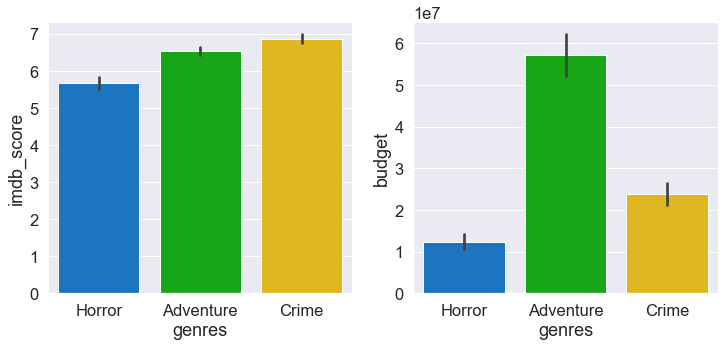

In [39]:
Genre1 = "Horror"
Genre2 = "Crime"
Genre3 = "Adventure"

films = DATA[(DATA.genres.str.startswith(Genre1)) | (DATA.genres.str.startswith(Genre2)) | (DATA.genres.str.startswith(Genre3))]
films.genres[films.genres.str.startswith(Genre1)] = Genre1
films.genres[films.genres.str.startswith(Genre2)] = Genre2
films.genres[films.genres.str.startswith(Genre3)] = Genre3
print(films.groupby('genres').size())

films2 = pd.DataFrame(data = films,columns= ['imdb_score', 'budget', 'genres'] )
label = films2['genres']
data_apprentissage, data_test, label_apprentissage, label_test = train_test_split(films2, label, test_size=0.01)


plt.figure(figsize = (12,5))
plt.subplot(121)
sns.barplot(y ="imdb_score", x="genres", data= data_apprentissage,palette ='nipy_spectral',hue_order = [Genre1, Genre2, Genre3])
plt.subplot(122)
sns.barplot(y ="budget", x="genres", data= data_apprentissage, palette ='nipy_spectral',hue_order = [Genre1, Genre2, Genre3]); 

In [40]:
from sklearn.neighbors import KNeighborsClassifier 
X = data_apprentissage.drop(columns ='genres') 

KNN = KNeighborsClassifier(n_neighbors= 3,weights='uniform') 
# Phase d'apprentissage
KNN.fit(X, label_apprentissage) 

KNeighborsClassifier(n_neighbors=3)

In [45]:
Xtest = data_test.drop(columns = 'genres')

print('Prédiction : ', KNN.predict(Xtest))
print('Vérité : ' , label_test)

Prédiction :  ['Horror' 'Adventure' 'Horror' 'Adventure' 'Adventure' 'Adventure'
 'Adventure' 'Adventure' 'Adventure']
Vérité :  movie_title
Halloween: The Curse of Michael Myers       Horror
Frozen                                   Adventure
L.I.E.                                       Crime
The Bank Job                                 Crime
Shattered                                    Crime
We Own the Night                             Crime
Cold Mountain                            Adventure
The Cat in the Hat                       Adventure
Shark Tale                               Adventure
Name: genres, dtype: object


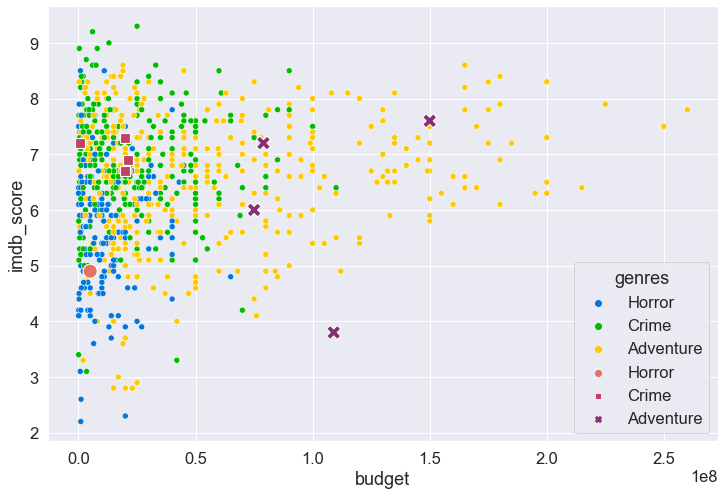

In [46]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = data_apprentissage, x = 'budget', y = 'imdb_score', hue = 'genres', legend = 'full', palette ='nipy_spectral', hue_order = [Genre1, Genre2, Genre3])
sns.scatterplot(data = data_test, x = 'budget', y = 'imdb_score',style='genres',s=200, hue = 'genres', legend = 'full',palette = 'flare', hue_order = [Genre1, Genre2, Genre3])
plt.show()

# 4. Evaluation des performances

**Validation croisée simple :** cela consiste en séparer le jeu de données en deux échantillons, le premier servant à l'apprentissage et le second servant de test.

Exemple : Si l'on effectue une classification sur le genre des films (variable 'genres'), on peut sélectionner 90% de la base de film pour apprendre la classification en fonction des autres variables (quantitatives) : 'budget' et 'imdb_score'. Et sur les 10% restant, on teste l'efficacité du classifieur en supprimant l'information de genres et en l'estimant.

In [50]:
data_apprentissage, data_test, label_apprentissage, label_test = train_test_split(films2, label, test_size=0.01)
X = data_apprentissage.drop(columns ='genres') 
KNN = KNeighborsClassifier(n_neighbors= 3,weights='uniform') 
KNN.fit(X, label_apprentissage) 

Xtest = data_test.drop(columns = 'genres')

print('Prédiction : ', KNN.predict(Xtest)[0:len(films_test)])
print('Vérité : ', y_truth.T)
print('Taux de bonne classification : ', np.sum(KNN.predict(Xtest) == label_test)/len(data_test))
print('Taux de bonne classification calculé directement avec le classifieur : ', KNN.score(Xtest, label_test))

Prédiction :  ['Horror' 'Horror' 'Crime' 'Adventure' 'Crime' 'Horror' 'Crime' 'Crime'
 'Adventure']
Vérité :  [['Crime' 'Horror' 'Adventure' 'Adventure' 'Horror' 'Horror' 'Crime'
  'Adventure' 'Horror' 'Crime']]
Taux de bonne classification :  0.7777777777777778
Taux de bonne classification calculé directement avec le classifieur :  0.7777777777777778


Le taux de bonne classification correspond au nombre de films correctement classés sur le nombre total de films de la base de test. 


Afin d'obtenir un taux de bonne classification représentatif de l'algorithme, il faut recommencer plusieurs fois la validation croisée en choisissant au hasard les individus servant au test et à l'apprentissage. 

**Syntaxe python :** Attention ce code ne fonctionne pas, il faut définir le jeux de données, les labels et placer dans la boucle l'algorithme de classification.

In [22]:
df = ... # Définir le jeu de données sur lequel vous travaillez
M = 10 #Nombre de validations
prop_bonne_classif = np.zeros(K)
for m in range(M):
    data_apprentissage, data_test, label_apprentissage, label_test = train_test_split(df, label, test_size=0.1)
    


    ##
    ## -- Ecrire la classification a effectuer -- ##
    ##
    prop_bonne_classif[m] = np.sum(prediction == label_test)/len(data_test))  
taux_bonne_classif = np.mean(prop_bonne_classif) 

SyntaxError: unmatched ')' (1966081026.py, line 13)

# Références

Galerie d'exemples de méthodes de régression et de classification avec scikit-learn : https://scikit-learn.org/stable/auto_examples/index.html 

Livre sur la régression : [Régression - Théorie et applications, Pierre-André Cornillon, Éric Matzner-Løber](https://link-springer-com.scd-rproxy.u-strasbg.fr/book/10.1007%2F978-2-287-39693-9) (disponible via la bibliothèque de l'Unistra)